In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
plt.style.use("seaborn")
#loading the data 
df = pd.read_csv(r"EOD-INTC.csv")

In [5]:
print(df.head())

         Date   Open   High    Low  Close      Volume  Dividend  Split  \
0  2017-12-28  46.36  46.36  45.95  46.22   9504372.0       0.0    1.0   
1  2017-12-27  46.11  46.36  46.00  46.11  13359671.0       0.0    1.0   
2  2017-12-26  46.28  46.47  45.95  46.08  15533328.0       0.0    1.0   
3  2017-12-22  46.33  47.02  46.02  46.70  33913537.0       0.0    1.0   
4  2017-12-21  47.54  47.59  46.56  46.76  42963451.0       0.0    1.0   

    Adj_Open   Adj_High    Adj_Low  Adj_Close  Adj_Volume  
0  43.376312  43.376312  42.992699  43.245322   9504372.0  
1  43.142402  43.376312  43.039481  43.142402  13359671.0  
2  43.301461  43.479233  42.992699  43.114333  15533328.0  
3  43.348243  43.993835  43.058194  43.694430  33913537.0  
4  44.480368  44.527150  43.563440  43.750569  42963451.0  


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,32.630198,32.914932,32.366546,32.662958,2.751649e+07,0.003856,1.0,28.803161,29.053664,28.570653,28.831914,2.751649e+07
std,4.878730,4.903212,4.834242,4.879762,1.278323e+07,0.030726,0.0,5.179240,5.205220,5.135358,5.180631,1.278323e+07
min,22.210000,22.240000,21.970000,22.067000,5.893789e+06,0.000000,1.0,18.230621,18.255246,18.033622,18.113242,5.893789e+06
25%,29.662500,30.035000,29.452500,29.737500,1.997469e+07,0.000000,1.0,25.858290,26.152602,25.545121,25.945847,1.997469e+07
50%,33.615000,33.950000,33.245000,33.640000,2.456095e+07,0.000000,1.0,28.915334,29.161248,28.688309,28.967708,2.456095e+07
75%,35.590000,35.890000,35.317500,35.597500,3.111780e+07,0.000000,1.0,32.141381,32.392136,32.003201,32.222476,3.111780e+07
max,47.540000,47.640000,46.660000,47.560000,1.358932e+08,0.272500,1.0,44.480368,44.573933,43.657004,44.499081,1.358932e+08


In [7]:
x = df[['High', 'Low','Open','Volume']].values
y = df['Close'].values

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [9]:
regressor =  LinearRegression()

In [10]:
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
print(regressor.coef_)

[ 7.76821070e-01  7.04472913e-01 -4.78864703e-01  2.33431829e-10]


In [12]:
print(regressor.intercept_)

-0.08915214990260978


In [13]:
predict = regressor.predict(x_test)

In [14]:
print(predict)

[33.96589778 36.44390497 33.60707607 34.95746686 29.85878027 34.66185985
 45.00955499 32.18452677 30.93687849 37.98472287 32.98095796 32.12621793
 36.62356027 24.61673369 22.67288143 32.52170863 36.14127149 34.76321242
 34.61213096 34.8310116  33.04377979 35.36697118 31.4816734  24.03136755
 29.27856744 36.56025303 32.69318244 33.63617375 37.5980531  23.33413823
 32.52184693 36.20645944 24.94467557 33.96945653 28.70068465 29.77783801
 45.80642567 32.6434416  29.23696587 29.35055175 37.78495982 36.79002089
 31.17665206 34.01897176 34.70658057 34.63635434 22.99227547 34.72147466
 34.98596991 36.02622111 25.99281514 34.60421481 34.96681356 29.68032799
 34.68933021 24.06074609 35.01730609 30.94021745 37.15377745 32.22240318
 36.71659889 33.91305757 43.11377296 30.92787934 32.04655166 28.15998121
 33.5460578  25.52837    30.96428469 24.77617877 36.45329801 32.34370539
 35.13752251 29.3397151  32.22097053 43.99581483 46.25269381 22.80764579
 31.54446016 35.86499663 37.35080472 32.11221611 32

In [15]:
dframe = pd.DataFrame({"Actual" : y_test.flatten() , 'Predicted' : predict.flatten()})

In [16]:
dframe.head(25)

,Actual,Predicted
0,34.030,33.965898
1,36.380,36.443905
2,33.470,33.607076
3,34.920,34.957467
4,29.600,29.858780
5,34.650,34.661860
6,44.630,45.009555
7,32.080,32.184527
8,31.060,30.936878
9,38.100,37.984723


In [17]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,predict))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,predict))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Absolute Error :  0.13330104651136257
Mean Squared Error :  0.03212295551654053
Root Mean Squared Error :  0.17922877982216062


In [18]:
graph = dframe.head(20)

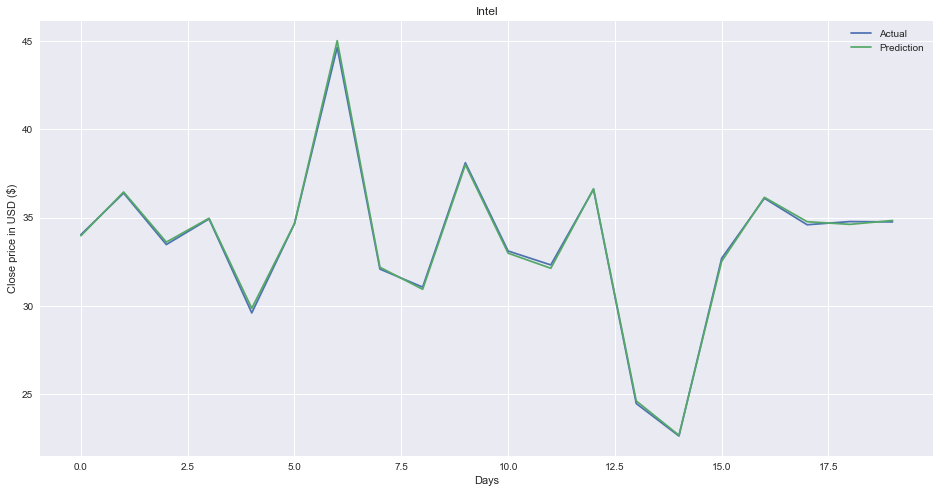

In [21]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("Intel")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot( graph)
plt.legend(['Actual','Prediction'])
plt.show()